Notebook https://www.kaggle.com/code/siddhvr/enefit-pebop-eda-plotly-and-modelling/notebook

Basic Submission Demo: https://www.kaggle.com/code/sohier/enefit-basic-submission-demo/notebook

Overview: https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/overview

Dataset Description
Your challenge in this competition is to predict the amount of electricity produced and consumed by Estonian energy customers who have installed solar panels. 
You'll have access to:
- weather data
- relevant energy prices, 
- records of the installed photovoltaic capacity.

💡 Nota bene:
All datasets follow the same time convention. 
- Time is given in EET/EEST. Most of the variables are a sum or an average over a period of 1 hour. 
- The datetime column (whatever its name) always gives the START of the 1-hour period. 
- However, for the weather datasets, some variables such as temperature or cloud cover, are given for a specific time, which is always the END of the 1-hour period.

TRAIN.csv
- county - An ID code for the county.
- is_business - Boolean for whether or not the prosumer is a business.
- product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
- TARGET - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
- is_consumption - Boolean for whether or not this row's target is consumption or production.
- datetime - The Estonian time in EET (UTC+2) / EEST (UTC+3). It describes the START of the 1-hour period on which target is given.
- data_block_id - All rows sharing the same data_block_id will be available at the SAME FORECAST TIME. This is a function of what information is available when forecasts are actually made, at 11 AM EACH MORNING. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.
- row_id - A unique identifier for the row.
- prediction_unit_id - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.


FORECAST_WEATHER.csv (records: 3.424512, 18 columns)

Weather forecasts that would have been available at prediction time. Sourced from the European Centre for Medium-Range Weather Forecasts.

min: 2021-09-01 02:00:00 
max: 2023-05-30 02:00:00

112 GPS areas, each with 1 prediction per hour, each 1,2,3,4...48 hours ahead
records per hour: 112 x 48 (hours ahead) = 5376
records per 24h day: 112 x 24 x 48 = 129.024
637 data_block_id's

- [latitude/longitude] - The coordinates of the weather forecast.
- origin_datetime - The timestamp of when the forecast was generated.
- hours_ahead - The number of hours between the forecast generation and the forecast weather. Each forecast covers 48 hours in total.
- temperature - The air temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- dewpoint - The dew point temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- cloudcover_[low/mid/high/total] - The percentage of the sky covered by clouds in the following altitude bands: 0-2 km, 2-6, 6+, and total. Estimated for the end of the 1-hour period.
- 10_metre_[u/v]_wind_component - The [eastward/northward] component of wind speed measured 10 meters above surface in meters per second. Estimated for the end of the 1-hour period.
- data_block_id
- forecast_datetime - The timestamp of the predicted weather. Generated from origin_datetime plus hours_ahead. This represents the start of the 1-hour period for which weather data are forecasted.
- direct_solar_radiation - The direct solar radiation reaching the surface on a plane perpendicular to the direction of the Sun accumulated during the hour, in watt-hours per square meter.
- surface_solar_radiation_downwards - The solar radiation, both direct and diffuse, that reaches a horizontal plane at the surface of the Earth, accumulated during the hour, in watt-hours per square meter.
- snowfall - Snowfall over hour in units of meters of water equivalent.
- total_precipitation - The accumulated liquid, comprising rain and snow that falls on Earth's surface over the described hour, in units of meters.

HISTORICAL_WEATHER.csv Historic weather data.

- datetime - This represents the start of the 1-hour period for which weather data are measured.
- temperature - Measured at the end of the 1-hour period.
- dewpoint - Measured at the end of the 1-hour period.
- rain - Different from the forecast conventions. The rain from large scale weather systems of the hour in millimeters.
- snowfall - Different from the forecast conventions. Snowfall over the hour in centimeters.
- surface_pressure - The air pressure at surface in hectopascals.
- cloudcover_[low/mid/high/total] - Different from the forecast conventions. Cloud cover at 0-3 km, 3-8, 8+, and total.
- windspeed_10m - Different from the forecast conventions. The wind speed at 10 meters above ground in meters per second.
- winddirection_10m - Different from the forecast conventions. The wind direction at 10 meters above ground in degrees.
- shortwave_radiation - Different from the forecast conventions. The global horizontal irradiation in watt-hours per square meter.
- direct_solar_radiation
- diffuse_radiation - Different from the forecast conventions. The diffuse solar irradiation in watt-hours per square meter.
- [latitude/longitude] - The coordinates of the weather station.
- data_block_id

GAS_PRICES.csv

- origin_date - The date when the day-ahead prices became available.
- forecast_date - The date when the forecast prices should be relevant.
- [lowest/highest]_price_per_mwh - The lowest/highest price of natural gas that on the day ahead market that trading day, in Euros per megawatt hour equivalent.
- data_block_id

CLIENT.csv

- product_type {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}
- county - See county_id_to_name_map.json for the mapping of ID codes to county names.
- eic_count - The aggregated number of consumption points (EICs - European Identifier Code).
- installed_capacity - Installed photovoltaic solar panel capacity in kilowatts.
- is_business - Boolean for whether or not the prosumer is a business.
- date (one day) 2021-09-01
- data_block_id (count=636)

ELECTRICITY_PRICES.csv

- origin_date - ...The date when the day-ahead prices became available?
- forecast_date - Represents the start of the 1-hour period when the price is valid
- euros_per_mwh - The price of electricity on the day ahead markets in euros per megawatt hour.
- data_block_id


public_timeseries_testing_util.py An optional file intended to make it easier to run custom offline API tests. See the script's docstring for details. You will need to edit this file before using it.

example_test_files/ Data intended to illustrate how the API functions. Includes the same files and columns delivered by the API. The first three data_block_ids are repeats of the last three data_block_ids in the train set.

example_test_files/sample_submission.csv A valid sample submission, delivered by the API. See this notebook for a very simple example of how to use the sample submission.

example_test_files/revealed_targets.csv The actual target values from the day before the forecast time. This amounts to two days of lag relative to the prediction times in the test.csv.

enefit/ Files that enable the API. Expect the API to deliver all rows in under 15 minutes and to reserve less than 0.5 GB of memory. The copy of the API that you can download serves the data from example_test_files/. You must make predictions for those dates in order to advance the API but those predictions are not scored. Expect to see roughly three months of data delivered initially and up to ten months of data by the end of the forecasting period.

In [2]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pickle
import time
from numpy import median
import lightgbm as lgb

In [1]:
import warnings
warnings.filterwarnings("ignore")

Set up dataframes to enable the selection process

0. Load countynames

In [6]:
# Read the JSON file
# with open('data\county_id_to_name_map.json','r') as file:
    # Load the JSON data into a Python dictionary
#     countynames = json.load(file)

# Print the resulting dictionary
# print(countynames)

{'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}


1. Create gps_point dataframe

In [ ]:
countynames = {'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}

station_dict = {'station1':'12','station2':'12','station3':'12','station4':'10','station5':'12','station6':'12','station7':'12','station8':'12','station9':'12','station10':'12','station11':'15','station12':'15','station13':'12','station14':'12','station15':'10','station16':'10','station17':'12','station18':'10','station19':'7','station20':'7','station21':'12','station22':'12','station23':'13','station24':'13','station25':'15','station26':'15','station27':'8','station28':'12','station29':'10','station30':'10','station31':'10','station32':'10','station33':'7','station34':'7','station35':'7','station36':'7','station37':'14','station38':'11','station39':'11','station40':'8','station41':'12','station42':'12','station43':'10','station44':'10','station45':'10','station46':'10','station47':'7','station48':'7','station49':'7','station50':'14','station51':'14','station52':'4','station53':'11','station54':'11','station55':'12','station56':'12','station57':'1','station58':'1','station59':'1','station60':'1','station61':'6','station62':'9','station63':'9','station64':'9','station65':'3','station66':'4','station67':'4','station68':'4','station69':'12',
'station70':'12','station71':'12','station72':'1','station73':'1','station74':'6','station75':'6','station76':'0','station77':'9','station78':'0','station79':'3','station80':'5','station81':'5','station82':'2','station83':'2','station84':'12','station85':'12','station86':'12','station87':'12','station88':'6','station89':'0','station90':'0','station91':'0','station92':'0','station93':'0','station94':'5','station95':'5','station96':'2','station97':'2','station98':'12','station99':'12','station100':'12','station101':'12','station102':'12','station103':'12','station104':'12','station105':'0','station106':'0','station107':'0','station108':'5','station109':'5','station110':'12','station111':'12','station112':'12'}

main_gps_dict = {'station1':'0','station2':'0','station3':'0','station4':'0','station5':'0','station6':'0','station7':'1','station8':'0','station9':'0','station10':'0','station11':'0','station12':'0','station13':'0','station14':'0','station15':'0','station16':'0','station17':'0','station18':'0','station19':'0','station20':'0','station21':'0','station22':'0','station23':'0','station24':'1','station25':'0','station26':'1','station27':'0','station28':'0','station29':'0','station30':'1','station31':'0','station32':'0','station33':'0','station34':'0','station35':'1','station36':'0','station37':'1','station38':'0','station39':'1','station40':'1','station41':'0','station42':'0','station43':'0','station44':'0','station45':'0','station46':'0','station47':'0','station48':'0','station49':'0','station50':'0','station51':'0','station52':'0','station53':'0','station54':'0','station55':'0','station56':'0','station57':'0','station58':'0','station59':'1','station60':'0','station61':'1','station62':'0','station63':'0','station64':'0','station65':'1','station66':'1','station67':'0','station68':'0','station69':'0','station70':'0','station71':'0',
                 'station72':'0','station73':'0','station74':'0','station75':'0','station76':'0','station77':'1','station78':'0','station79':'0','station80':'0','station81':'0','station82':'0','station83':'0','station84':'0','station85':'0','station86':'0','station87':'0','station88':'0','station89':'0','station90':'0','station91':'1','station92':'0','station93':'0','station94':'1','station95':'0','station96':'1','station97':'0','station98':'0','station99':'0','station100':'0','station101':'0','station102':'0','station103':'0','station104':'0','station105':'0','station106':'0','station107':'0','station108':'0','station109':'0','station110':'0','station111':'0','station112':'0'}


def create_gps():
    df_forecast = pd.read_csv('data/forecast_weather.csv', keep_default_na=False)
    
    df = df_forecast[['latitude', 'longitude']].drop_duplicates()
    df['station'] = ['station{}'.format(i + 1) for i in range(len(df))]
    df['county_code'] = df['station'].map(station_dict)
    df['county_name'] = df['county_code'].map(countynames)  # Assuming countynames is defined
    df['lat/long'] = df['latitude'].astype(str) + ',' + df['longitude'].astype(str)
    df['main_gps_county'] = df['station'].map(main_gps_dict)
    
    return df

# Example usage
gps_point = create_gps()

2. Load the files

In [3]:
# Read the files
client = pd.read_csv('data/client.csv', keep_default_na=False)
forecast = pd.read_csv('data/forecast_weather.csv', keep_default_na=False)
hist = pd.read_csv('data/historical_weather.csv', keep_default_na=False)
gas = pd.read_csv('data/gas_prices.csv', keep_default_na=False)
elec = pd.read_csv('data/electricity_prices.csv', keep_default_na=False)
train = pd.read_csv('data/train.csv', keep_default_na=False)
calendar = pd.read_csv('my-data/calendar.csv', keep_default_na=False)
gps_point = pd.read_csv('my-data/gps_point.csv', keep_default_na=False)
code_list = pd.read_csv('my-data/code_list.csv', keep_default_na=False)

3. Add lat/long columns to forecast and hist

In [4]:
hist['lat/long'] = hist['latitude'].astype(str) + ',' + hist['longitude'].astype(str)
forecast['lat/long'] = forecast['latitude'].astype(str) + ',' + forecast['longitude'].astype(str)

4. Remove irrelevant rows from forecast (too many hours ahead)

In [6]:
forecast = forecast[forecast['hours_ahead'] <= 24]

5. Reduce forecast and hist to only relevant gps data

In [5]:
# Extract lat/long pairs where main_gps_county is 1
selected_gps = gps_point.loc[gps_point['main_gps_county'] == '1', 'lat/long'].tolist()

# Filter hist based on lat/long
hist = hist[hist['lat/long'].isin(selected_gps)]
forecast = forecast[forecast['lat/long'].isin(selected_gps)]

6. Merge county column to hist and forecast (to enable weather merging to train/test)

In [6]:
# Merge 'hist' and 'foreceast'with 'gps_point' based on 'lat/long'
hist = pd.merge(hist, gps_point[['lat/long', 'county_code']], on='lat/long', how='left')
forecast = pd.merge(forecast, gps_point[['lat/long', 'county_code']], on='lat/long', how='left')
hist['county_code'] = hist['county_code'].astype('int64')
forecast['county_code'] = forecast['county_code'].astype('int64')

### Set Date fields

1. Dtypes

In [107]:
# print all the dtypes
df_list = [client,forecast,hist,gas,elec,train,calendar]

for df in df_list:
    df_name = [name for name, obj in globals().items() if obj is df][0]
    print(f"{df_name}:\n{df.dtypes}\n")

client:
product_type                   int64
county                         int64
eic_count                      int64
installed_capacity           float64
is_business                    int64
date                  datetime64[ns]
data_block_id                  int64
code                           int64
dtype: object

forecast:
latitude                                    float64
longitude                                   float64
origin_datetime                      datetime64[ns]
hours_ahead                                   int64
temperature                                 float64
dewpoint                                    float64
cloudcover_high                             float64
cloudcover_low                              float64
cloudcover_mid                              float64
cloudcover_total                            float64
10_metre_u_wind_component                   float64
10_metre_v_wind_component                   float64
data_block_id                                 i

2. Print unique values

In [ ]:
# Check the datetime columns
cols = [
    client['date'],
    forecast['origin_datetime'],
    forecast['forecast_datetime'],
    hist['datetime'],
    gas['forecast_date'],
    gas['origin_date'],
    elec['forecast_date'],
    elec['origin_date'],
    train['datetime']   
]

for col in cols:
    values = col.unique()
    print(f"Unique Values in '{col.name}' column:", values)
    print("")

3. Convert relevant columns to datetime

In [7]:
# If you want to update the original dataframe columns, you need to assign the converted values back:
client['date'] = pd.to_datetime(client['date'], errors='coerce')
forecast['origin_datetime'] = pd.to_datetime(forecast['origin_datetime'], errors='coerce')
forecast['forecast_datetime'] = pd.to_datetime(forecast['forecast_datetime'], errors='coerce')
hist['datetime'] = pd.to_datetime(hist['datetime'], errors='coerce')
gas['forecast_date'] = pd.to_datetime(gas['forecast_date'], format='%Y-%m-%d', errors='coerce')
gas['origin_date'] = pd.to_datetime(gas['origin_date'], format='%Y-%m-%d', errors='coerce')
elec['forecast_date'] = pd.to_datetime(elec['forecast_date'], errors='coerce')
elec['origin_date'] = pd.to_datetime(elec['origin_date'], errors='coerce')
train['datetime'] = pd.to_datetime(train['datetime'], errors='coerce')
calendar['date'] = pd.to_datetime(calendar['date'], errors='coerce')

4. Create new separate date and time columns and add some columns

In [8]:
# For forecast DataFrame
forecast['origin_datetime_date'] = forecast['origin_datetime'].dt.date
forecast['origin_datetime_time'] = forecast['origin_datetime'].dt.time

forecast['forecast_datetime_date'] = forecast['forecast_datetime'].dt.date
forecast['forecast_datetime_time'] = forecast['forecast_datetime'].dt.time

# For hist DataFrame
hist['datetime_date'] = hist['datetime'].dt.date
hist['datetime_time'] = hist['datetime'].dt.time

# For elec DataFrame
elec['forecast_date_date'] = elec['forecast_date'].dt.date
elec['forecast_date_time'] = elec['forecast_date'].dt.time

elec['origin_date_date'] = elec['origin_date'].dt.date
elec['origin_date_time'] = elec['origin_date'].dt.time

# For train DataFrame
train['datetime_date'] = train['datetime'].dt.date
train['datetime_time'] = train['datetime'].dt.time
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['week_num'] = train['datetime'].dt.isocalendar().week
train['week_num'] = train['week_num'].astype('int64')
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

6. Convert train datetime_date to datetime and merge working_day

In [9]:
train['datetime_date'] = pd.to_datetime(train['datetime_date'])
train = pd.merge(train, calendar[['date', 'working_day']], left_on='datetime_date', right_on='date', how='left')
train = train.drop(columns=['date'])

7. Convert new date columns to datetime dtype

In [10]:
# Convert new '_date' columns to datetime64[ns] dtype
forecast['origin_datetime_date'] = pd.to_datetime(forecast['origin_datetime_date'])
forecast['forecast_datetime_date'] = pd.to_datetime(forecast['forecast_datetime_date'])

hist['datetime_date'] = pd.to_datetime(hist['datetime_date'])

elec['forecast_date_date'] = pd.to_datetime(elec['forecast_date_date'])
elec['origin_date_date'] = pd.to_datetime(elec['origin_date_date'])

In [11]:
# Assuming the columns are already datetime objects, if not, convert them first
hist['datetime_time'] = pd.to_datetime(hist['datetime_time'], format='%H:%M:%S').dt.hour.astype(int)
elec['forecast_date_time'] = pd.to_datetime(elec['forecast_date_time'], format='%H:%M:%S').dt.hour.astype(int)
elec['origin_date_time'] = pd.to_datetime(elec['origin_date_time'], format='%H:%M:%S').dt.hour.astype(int)
train['datetime_time'] = pd.to_datetime(train['datetime_time'], format='%H:%M:%S').dt.hour.astype(int)
# test['prediction_datetime_time'] = pd.to_datetime(test['prediction_datetime_time'], format='%H:%M:%S').dt.hour.astype(int)
# targ['datetime_time'] = pd.to_datetime(targ['datetime_time'], format='%H:%M:%S').dt.hour.astype(int)
forecast['origin_datetime_time'] = pd.to_datetime(forecast['origin_datetime_time'], format='%H:%M:%S').dt.hour.astype(int)
forecast['forecast_datetime_time'] = pd.to_datetime(forecast['forecast_datetime_time'], format='%H:%M:%S').dt.hour.astype(int)

8. Set target column in train to float

In [12]:
# Replace empty strings with NaN
train['target'] = train['target'].replace('', np.nan).astype(float)

9. Add mean gas price to gas df

In [13]:
gas['mwh_mean'] = gas[['lowest_price_per_mwh', 'highest_price_per_mwh']].mean(axis=1)

10. Add code column to train

In [14]:
def generate_code(row):
    return (row['county'] * 7) + (row['product_type'] * 2) + row['is_business']

# Apply the function to create the 'code' column
train['code'] = train.apply(generate_code, axis=1)

11. Add code to column client

In [15]:
def generate_code(row):
    return (row['county'] * 7) + (row['product_type'] * 2) + row['is_business']

# Apply the function to create the 'code' column
client['code'] = client.apply(generate_code, axis=1)

### Check outliers

1. Change outliers in electricity column

In [16]:
# Calculate the median and median absolute deviation (MAD)
median_val = elec['euros_per_mwh'].median()
mad_val = elec['euros_per_mwh'].mad()

# Calculate the modified Z-score
elec['z_score'] = 0.6745 * ((elec['euros_per_mwh'] - median_val) / mad_val)

# Define a threshold for outliers (adjust as needed)
threshold = 6

# Identify and remove outliers
outliers = abs(elec['z_score']) > threshold

# Replace outlier values with NaN
elec.loc[outliers, 'euros_per_mwh'] = np.nan

# Forward fill NaN values with the previous non-NaN values
elec['euros_per_mwh'] = elec['euros_per_mwh'].fillna(method='ffill')

# Print the number of outliers replaced
print(f"Number of outliers replaced: {np.sum(outliers)}")

Number of outliers replaced: 3


### Merge extra data to train

In [17]:
# Merge electricity data
train = train.merge(elec, left_on='datetime', right_on='forecast_date', how='left', suffixes=('', '_elec'))

# Merge gas data
train = train.merge(gas, left_on='datetime_date', right_on='forecast_date', how='left', suffixes=('', '_gas'))

# If you want to specify which columns to merge (otherwise do: train = pd.merge(train, client,left_on=['datetime_date', 'code'], etc...
train = pd.merge(train, client[['date', 'code', 'eic_count', 'installed_capacity','data_block_id']],
                              left_on=['datetime_date', 'code'],
                              right_on=['date', 'code'],
                              how='left',
                              suffixes=('_train_solar_', '_client'))
# Hist data
train = pd.merge(train, hist,
                              left_on=['datetime', 'county'],
                              right_on=['datetime', 'county_code'],
                              how='left',
                              suffixes=('_hist_weather_', '_hist_weather2_'))

In [19]:
columns = ['county', 'is_business', 'product_type', 'target', 'is_consumption','datetime', 'prediction_unit_id', 'datetime_date_hist_weather_','year', 'month', 'week_num', 'day','hour', 'working_day', 'code', 'euros_per_mwh','mwh_mean', 'eic_count','installed_capacity', 'temperature', 'dewpoint','rain', 'snowfall', 'surface_pressure', 'cloudcover_total','cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'windspeed_10m','winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation','diffuse_radiation','lat/long']
# len(columns)
train = train[columns]

In [20]:
train = train[train['datetime_date_hist_weather_'] < "2023-05-30"]

### Split the dataframes

1. Save train

In [72]:
train.to_csv('regions/train.csv', index=False)

2. Split train

In [ ]:
train_solar = train[train['is_consumption'] == 0] # lightgbm model
train_cons = train[train['is_consumption'] == 1] # lr models

3. Save train_cons & train_solar

In [74]:
train_cons.to_csv('regions/train_cons.csv', index=False)
train_solar.to_csv('regions/train_solar.csv', index=False)

4. Load train_cons & train_solar

In [60]:
train_cons = pd.read_csv('regions/train_cons.csv', keep_default_na=False)
# train_solar = pd.read_csv('regions/train_solar.csv', keep_default_na=False)

In [55]:
train_cons.shape

(1006056, 34)

### pt. 1 - Consumption (Prophet) losse lr modellen

1. Missing row value combinations
Dataframe train misses data for on some days for the following codes

code: 36	records missing: 1488
code: 53	records missing: 7632
code: 75	records missing: 17712
code: 81	records missing: 2208
code: 82	records missing: 6288
code: 103	records missing: 6864

In [ ]:
# Code to detect missing days for certain codes:
min_max_per_code = train_cons.groupby('code')['datetime'].agg(['min', 'max'])
min_max_per_code['days_difference'] = (min_max_per_code['max'] - min_max_per_code['min']).dt.days

In [51]:
train_cons.dtypes

county                                  int64
is_business                             int64
product_type                            int64
target                                float64
is_consumption                          int64
datetime                       datetime64[ns]
prediction_unit_id                      int64
datetime_date_hist_weather_            object
year                                    int64
month                                   int64
week_num                                int64
day                                     int64
hour                                    int64
working_day                             int64
code                                    int64
euros_per_mwh                         float64
mwh_mean                              float64
eic_count                             float64
installed_capacity                    float64
temperature                           float64
dewpoint                              float64
rain                              

In [61]:
# Replace empty strings with NaN
train_cons = pd.read_csv('regions/train_cons.csv', keep_default_na=False)
train_cons['target'] = train_cons['target'].replace('', np.nan).astype(float)
train_cons['datetime'] = pd.to_datetime(train_cons['datetime'])
code_list = pd.read_csv('my-data/code_list.csv', keep_default_na=False)
cd_list = code_list['code'].to_list()

### Prophet Source Model

In [52]:
proph_cd_list = [21,77,84,98,105]

In [53]:
# Assuming 'train_cons' is your original DataFrame
# and 'cd_list' is the list of unique codes

# Create an empty dictionary to store models and predictions
models_and_predictions = {}

# Iterate through each code in the list
for code in proph_cd_list:
    # Filter the original DataFrame for the specific code
    df_code = train_cons[train_cons['code'] == code].copy()
    
    # Forward fill NaN values in the target column
    df_code['target'].fillna(method='ffill', inplace=True)
    
    # Rename columns as needed
    df_code.rename(columns={'datetime': 'ds', 'target': 'y'}, inplace=True)
    
    # Keep only the desired columns
    df_code = df_code[['ds', 'y', 'temperature']]
    
    # Train-test split
    train_size = int(len(df_code) * 0.8)  # 80% for training, 20% for testing
    train, test = df_code[:train_size], df_code[train_size:]
    
    # Create a Prophet model with an additional regressor
    model = Prophet()
    model.add_regressor('temperature')  # Add the 'temperature' column as a regressor

    # Save the model using pickle with the name model_[code]
    model_name = f'model_{code}.pkl'
    with open(model_name, 'wb') as model_file:
        pickle.dump(model, model_file)
    
    # Fit the model with training data
    model.fit(train)
    
    # Create a DataFrame with future dates for prediction
    future = model.make_future_dataframe(periods=len(test), freq='H', include_history=False)
    
    # Extract 'temperature' values for the entire time range
    all_temperatures = df_code['temperature'][:len(train) + len(test)].values
    
    # Add 'temperature' values to the future DataFrame for prediction
    future['temperature'] = all_temperatures[len(train):]
    
    # Make predictions
    forecast = model.predict(future)
    
    # Extract predictions for the test set
    test_predictions = forecast[['ds', 'yhat']].tail(len(test))
    
    # Evaluate performance on the test set
    mae = mean_absolute_error(test['y'], test_predictions['yhat'])
    print(f'Mean Absolute Error on the test set for code {code}: {mae}')
    
    # Store the model and predictions in the dictionary
    models_and_predictions[f'model_{code}'] = model
    models_and_predictions[f'predictions_{code}'] = test_predictions

# Access the resulting models and predictions using keys like models_and_predictions['model_2'], models_and_predictions['predictions_2'], etc.


17:44:06 - cmdstanpy - INFO - Chain [1] start processing
17:44:08 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set for code 21: 148.4472326099552


17:44:09 - cmdstanpy - INFO - Chain [1] start processing
17:44:11 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set for code 77: 225.47469721876593


17:44:12 - cmdstanpy - INFO - Chain [1] start processing
17:44:16 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set for code 84: 1086.3065941933419


17:44:17 - cmdstanpy - INFO - Chain [1] start processing
17:44:20 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set for code 98: 129.1789339227874


17:44:21 - cmdstanpy - INFO - Chain [1] start processing
17:44:24 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set for code 105: 440.8346104837984


### Linear Regression

Source LR model

In [82]:
# Replace empty strings with NaN
train_cons = pd.read_csv('regions/train_cons.csv', keep_default_na=False)
train_cons['target'] = train_cons['target'].replace('', np.nan).astype(float)
train_cons['datetime'] = pd.to_datetime(train_cons['datetime'])
code_list = pd.read_csv('my-data/code_list.csv', keep_default_na=False)
cd_list = code_list['code'].to_list()

In [68]:
from sklearn.linear_model import LinearRegression
import pickle

# Assuming 'train_cons' is your original DataFrame
# and 'cd_list' is the list of unique codes

# Create an empty dictionary to store models and predictions
models_and_predictions = {}

# Iterate through each code in the list
for code in cd_list:
    # Filter the original DataFrame for the specific code
    df_code = train_cons[train_cons['code'] == code].copy()
    
    # Forward fill NaN values in the target column
    df_code['target'].fillna(method='ffill', inplace=True)
    
    # Train-test split
    train_size = int(len(df_code) * 0.8)  # 80% for training, 20% for testing
    train, test = df_code[:train_size], df_code[train_size:]
    
    # Reshape data for Linear Regression
    X_train = train['temperature'].values.reshape(-1, 1)
    y_train = train['target']
    
    X_test = test['temperature'].values.reshape(-1, 1)
    y_test = test['target']
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model with training data
    model.fit(X_train, y_train)
    
    # Save the model using pickle with the name model_[code]
    # model_name = f'model_{code}.pkl'
    # with open(model_name, 'wb') as model_file:
    #    pickle.dump(model, model_file)
    
    # Make predictions
    test_predictions = model.predict(X_test)
    
    # Evaluate performance on the test set
    mae = mean_absolute_error(y_test, test_predictions)
    mpe = np.mean((y_test - test_predictions) / y_test) * 100  # Calculate Mean Percentage Error
    
    print(f'Mean Absolute Error on the test set for code {code}: {mae}')
    print(f'Mean Percentage Error on the test set for code {code}: {mpe}%')

Mean Absolute Error on the test set for code 2: 296.2072258597924
Mean Percentage Error on the test set for code 2: 17.443470166263047%
Mean Absolute Error on the test set for code 4: 11.571349753422675
Mean Percentage Error on the test set for code 4: -178.02142617383475%
Mean Absolute Error on the test set for code 6: 634.2566114552619
Mean Percentage Error on the test set for code 6: -12.674799577984253%
Mean Absolute Error on the test set for code 1: 475.13612489384997
Mean Percentage Error on the test set for code 1: 37.199309267315364%
Mean Absolute Error on the test set for code 3: 203.59469295755926
Mean Percentage Error on the test set for code 3: -6.9032838622456625%
Mean Absolute Error on the test set for code 5: 30.361809517944643
Mean Percentage Error on the test set for code 5: -inf%
Mean Absolute Error on the test set for code 7: 1721.931482575423
Mean Percentage Error on the test set for code 7: -4.2370272622098355%
Mean Absolute Error on the test set for code 9: 5.1653

In [11]:
df_3 = train_cons[train_cons['code'] == 3]

In [12]:
# Load the saved model
model_path_3 = 'models/model_3.pkl'  # Adjust the path accordingly
with open(model_path_3, 'rb') as model_file:
    model_3 = pickle.load(model_file)

# Assuming df_3 is your test DataFrame for code 3
X_test_3 = df_3['temperature'].values.reshape(-1, 1)

# Make predictions using the loaded model
predictions_3 = model_3.predict(X_test_3)

# Print or use the predictions as needed
print(f'Predictions for code 3: {predictions_3}')


Predictions for code 3: [617.26755704 629.21775977 647.14306387 ... 757.68243914 775.60774323
 781.5828446 ]


Not used (LR multiple features)

In [70]:
from sklearn.linear_model import LinearRegression

# Assuming 'train_cons' is your original DataFrame
# and 'cd_list' is the list of unique codes

# Create an empty dictionary to store models and predictions
models_and_predictions = {}

# Iterate through each code in the list
for code in cd_list:
    # Filter the original DataFrame for the specific code
    df_code = train_cons[train_cons['code'] == code].copy()
    
    # Forward fill NaN values in the target column
    df_code['target'].fillna(method='ffill', inplace=True)
    
    # Train-test split
    train_size = int(len(df_code) * 0.8)  # 80% for training, 20% for testing
    train, test = df_code[:train_size], df_code[train_size:]
    
    # Select relevant features (add or remove columns as needed)
    features = ['temperature', 'working_day', 'hour']
    
    # Reshape data for Linear Regression
    X_train = train[features]
    y_train = train['target']
    
    X_test = test[features]
    y_test = test['target']
    
    # Create a Linear Regression model
    model = LinearRegression()
    
    # Fit the model with training data
    model.fit(X_train, y_train)
    
    # Make predictions
    test_predictions = model.predict(X_test)

    # Evaluate performance on the test set
    mae = mean_absolute_error(y_test, test_predictions)
    mpe = np.mean((y_test - test_predictions) / y_test) * 100  # Calculate Mean Percentage Error
    
    print(f'Mean Absolute Error on the test set for code {code}: {mae}')
    print(f'Mean Percentage Error on the test set for code {code}: {mpe}%')
    
    # Store the model and predictions in the dictionary
    # models_and_predictions[f'model_{code}_linear'] = model
    # models_and_predictions[f'predictions_{code}_linear'] = test_predictions

Mean Absolute Error on the test set for code 2: 296.92509087700915
Mean Percentage Error on the test set for code 2: 17.101764610309115%
Mean Absolute Error on the test set for code 4: 11.482972481421656
Mean Percentage Error on the test set for code 4: -177.85774048777284%
Mean Absolute Error on the test set for code 6: 635.3495926301105
Mean Percentage Error on the test set for code 6: -12.952365732903543%
Mean Absolute Error on the test set for code 1: 471.9503617014924
Mean Percentage Error on the test set for code 1: 38.839957750222794%
Mean Absolute Error on the test set for code 3: 188.9838148485095
Mean Percentage Error on the test set for code 3: -4.257728434095901%
Mean Absolute Error on the test set for code 5: 30.75070911369771
Mean Percentage Error on the test set for code 5: -inf%
Mean Absolute Error on the test set for code 7: 1453.616533276986
Mean Percentage Error on the test set for code 7: -1.3254644330402559%
Mean Absolute Error on the test set for code 9: 5.1830622

Gradient Boosting (production version)

In [ ]:
# import libraries
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pickle
import time
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Replace empty strings with NaN
train_cons = pd.read_csv('regions/train_cons.csv', keep_default_na=False)
train_cons['target'] = train_cons['target'].replace('', np.nan).astype(float)
train_cons['datetime'] = pd.to_datetime(train_cons['datetime'])
code_list = pd.read_csv('my-data/code_list.csv', keep_default_na=False)
cd_list = code_list['code'].to_list()

In [80]:
# Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

# Create an empty dictionary to store models and predictions
models_and_predictions = {}

# Iterate through each code in the list
for code in cd_list:
    # Filter the original DataFrame for the specific code
    df_code = train_cons[train_cons['code'] == code].copy()
    
    # Forward fill NaN values in the target column
    df_code['target'].fillna(method='ffill', inplace=True)
    
    # Train-test split
    X = df_code[['temperature', 'working_day', 'hour']]  # Select relevant features
    y = df_code['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create a Gradient Boosting model
    # Best hyperparameters
    best_hyperparameters = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

    # Create a Gradient Boosting model with the best hyperparameters
    model = GradientBoostingRegressor(**best_hyperparameters)
        
    # Fit the model with training data
    model.fit(X_train, y_train)
    
    # Make predictions
    test_predictions = model.predict(X_test)

    # Save the model using pickle with the name model_[code]
    model_name = f'model_{code}.pkl'
    with open(model_name, 'wb') as model_file:
        pickle.dump(model, model_file)

    # Evaluate performance on the test set
    mae = mean_absolute_error(y_test, test_predictions)
    mpe = np.mean((y_test - test_predictions) / y_test) * 100  # Calculate Mean Percentage Error
    
    print(f'Mean Absolute Error on the test set for code {code}: {mae}')
    print(f'Mean Percentage Error on the test set for code {code}: {mpe}%')   

Mean Absolute Error on the test set for code 2: 169.92973925033215
Mean Percentage Error on the test set for code 2: -27.755362729267535%
Mean Absolute Error on the test set for code 4: 6.135853047178554
Mean Percentage Error on the test set for code 4: -25.09076924998861%
Mean Absolute Error on the test set for code 6: 346.45638132942844
Mean Percentage Error on the test set for code 6: -16.255137489049023%
Mean Absolute Error on the test set for code 1: 313.7414634319982
Mean Percentage Error on the test set for code 1: -inf%
Mean Absolute Error on the test set for code 3: 160.06715794771637
Mean Percentage Error on the test set for code 3: -8.489435836959444%
Mean Absolute Error on the test set for code 5: 42.49691203007953
Mean Percentage Error on the test set for code 5: -inf%
Mean Absolute Error on the test set for code 7: 919.0774505338618
Mean Percentage Error on the test set for code 7: -2.6055723853217754%
Mean Absolute Error on the test set for code 9: 3.879276968021111
Mean

Tune hyperparameters of the Gradient Boosting Model

In [74]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.5],  # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
}

# Create a Gradient Boosting model
base_model = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
test_predictions = best_model.predict(X_test)

# Evaluate performance on the test set
mae = mean_absolute_error(y_test, test_predictions)
mpe = np.mean((y_test - test_predictions) / y_test) * 100  # Calculate Mean Percentage Error

print("Best hyperparameters:", best_params)
print(f'Mean Absolute Error on the test set: {mae}')
print(f'Mean Percentage Error on the test set: {mpe}%')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.4s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.1s
[CV] END ...learning_rate=0.01, max_depth=5, n_e

Check some of the features of the Gradient Boosting models

In [81]:
import pickle

# Load the Gradient Boosting model from the file
model_path = 'models/model_1.pkl'
with open(model_path, 'rb') as file:
    model = pickle.load(file)

# If feature importance was computed during training
if hasattr(model, 'feature_importances_'):
    feature_importance = model.feature_importances_
    feature_names = model.feature_names_in_

    # Sort features by importance
    sorted_indices = feature_importance.argsort()[::-1]
    sorted_features = [(feature_names[idx], feature_importance[idx]) for idx in sorted_indices]

    print("Features and their importance:")
    for feature, importance in sorted_features:
        print(f"{feature}: {importance}")
else:
    print("Feature importance was not computed during training.")

Features and their importance:
temperature: 0.6009425512408241
hour: 0.31275987110694126
working_day: 0.08629757765223466


### Create plots to check outliers and correlation

1. Define columns

In [248]:
tal_train_solar.select_dtypes(include='int64').columns

Index(['datetime_time', 'county', 'is_business', 'product_type'], dtype='object')

In [30]:
num_cols_solar = ['datetime_time','euros_per_mwh', 'mwh_mean', 'installed_capacity', 'temperature',
       'dewpoint', 'rain', 'snowfall', 'surface_pressure', 'cloudcover_total',
       'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation']

cat_cols_solar = ['is_business', 'product_type']

target_col = ['target']

2. Create 5000 Sample records (solar)

In [31]:
tal_train_solar_sample = tal_train_solar.sample(n=5000, random_state=42)

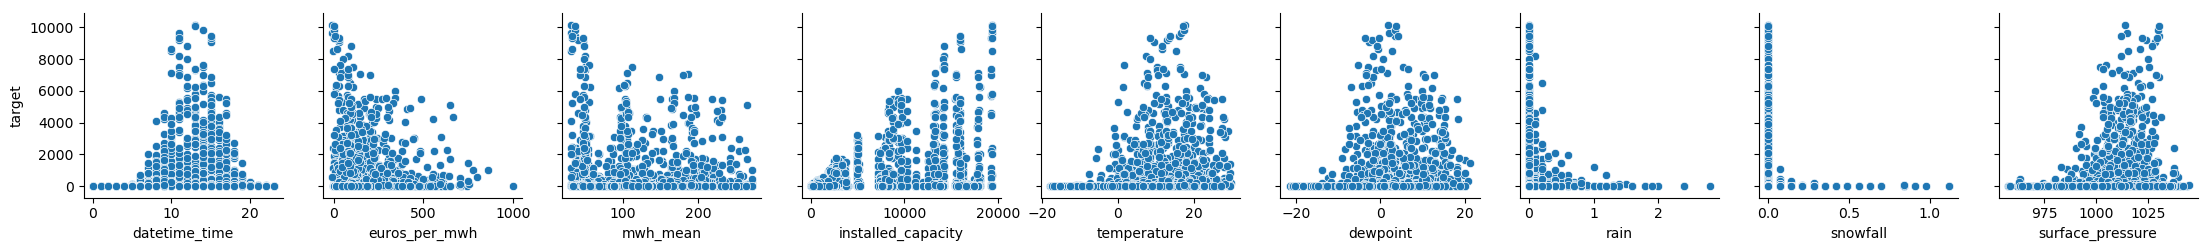

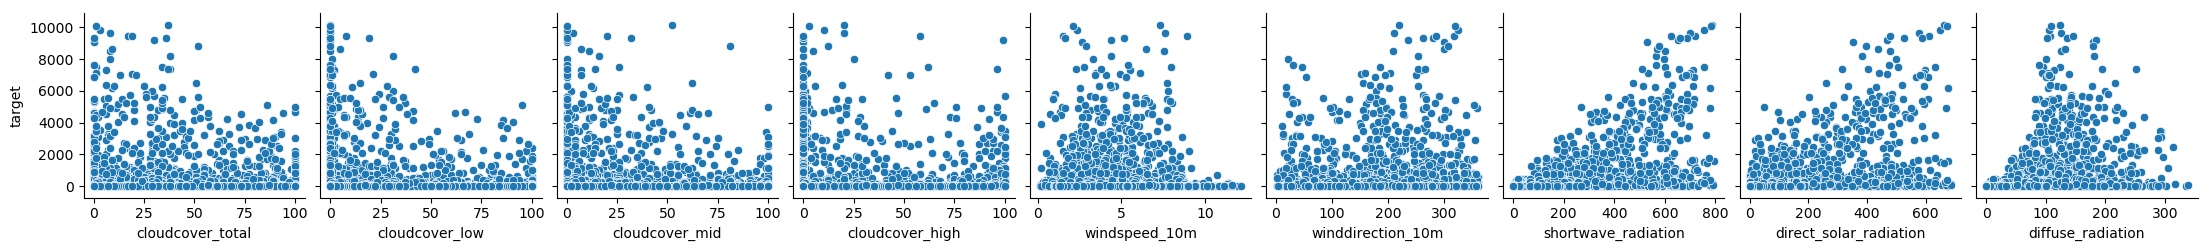

In [32]:
# Relationships between Price and each individual feature

half = len(num_cols_solar)//2

fig1=sns.pairplot(
    tal_train_solar_sample,
    x_vars=num_cols_solar[:half],
    y_vars=target_col
)

fig2=sns.pairplot(
    tal_train_solar_sample,
    x_vars=num_cols_solar[half:],
    y_vars=target_col
)

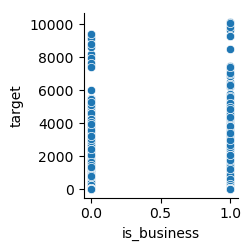

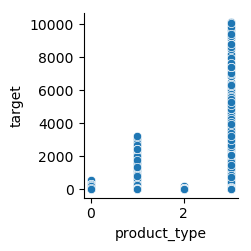

In [33]:
# Relationships between Price and each individual feature

half = len(cat_cols_solar)//2

fig1=sns.pairplot(
    tal_train_solar_sample,
    x_vars=cat_cols_solar[:half],
    y_vars=target_col
)

fig2=sns.pairplot(
    tal_train_solar_sample,
    x_vars=cat_cols_solar[half:],
    y_vars=target_col
)

3. Create 5000 Sample records (consumption)

In [34]:
num_cols_cons = ['datetime_time','euros_per_mwh', 'mwh_mean', 'temperature',
       'dewpoint', 'rain', 'snowfall', 'surface_pressure', 'cloudcover_total',
       'cloudcover_low', 'cloudcover_mid', 'cloudcover_high', 'windspeed_10m',
       'winddirection_10m', 'shortwave_radiation', 'direct_solar_radiation',
       'diffuse_radiation']

cat_cols_cons = ['is_business', 'product_type', 'working_day']

target_col = ['target']

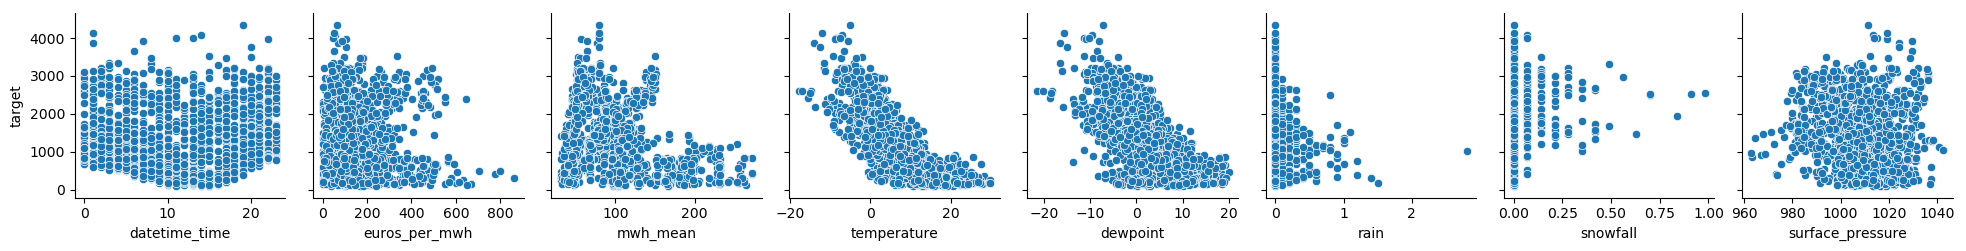

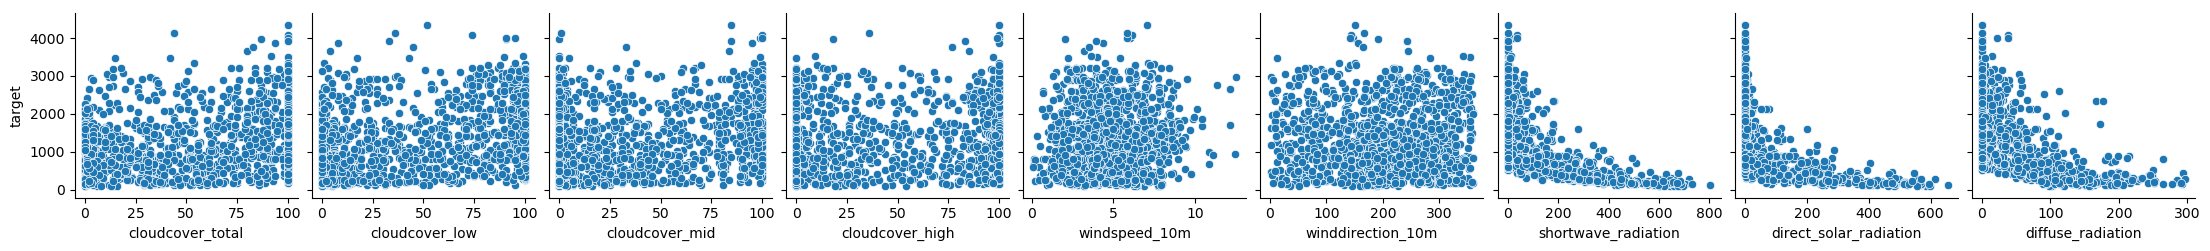

In [85]:
# Relationships between Price and each individual feature

half = len(num_cols_cons)//2

fig1=sns.pairplot(
    tal_train_cons_sample,
    x_vars=num_cols_cons[:half],
    y_vars=target_col
)

fig2=sns.pairplot(
    tal_train_cons_sample,
    x_vars=num_cols_cons[half:],
    y_vars=target_col
)

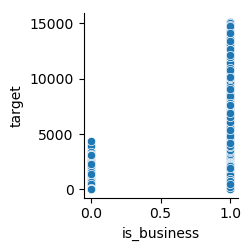

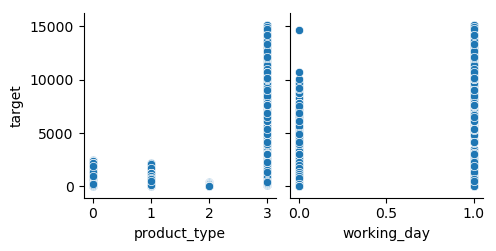

In [37]:
# Relationships between Price and each individual feature

half = len(cat_cols_cons)//2

fig1=sns.pairplot(
    tal_train_cons_sample,
    x_vars=cat_cols_cons[:half],
    y_vars=target_col
)

fig2=sns.pairplot(
    tal_train_cons_sample,
    x_vars=cat_cols_cons[half:],
    y_vars=target_col
)

x. Correlation

In [86]:
for col in tal_train_cons_sample[num_cols_cons].columns:
    corr = tal_train_cons_sample[target_col].corrwith(tal_train_cons_sample[col])
    print (col, corr.to_string(header=False, index=False)) # print the string without header and index

datetime_time -0.002985
euros_per_mwh -0.07611
mwh_mean -0.277298
temperature -0.775568
dewpoint -0.662745
rain -0.099227
snowfall 0.244406
surface_pressure -0.134789
cloudcover_total 0.334661
cloudcover_low 0.377446
cloudcover_mid 0.193622
cloudcover_high 0.122536
windspeed_10m 0.087735
winddirection_10m 0.023823
shortwave_radiation -0.598399
direct_solar_radiation -0.545292
diffuse_radiation -0.57233


### Use prophet on the first dataset

In [133]:
code_36_dates_counts = train[train['code'] == 36]['datetime_date_hist_weather_'].value_counts().reset_index()
code_36_dates_counts.columns = ['datetime_date_hist_weather_', 'count']

# Sort by 'datetime_date_hist_weather_'
code_36_dates_counts = code_36_dates_counts.sort_values(by='datetime_date_hist_weather_')

print(code_36_dates_counts)

    datetime_date_hist_weather_  count
0                    2021-09-01     48
303                  2021-09-02     48
400                  2021-09-03     48
401                  2021-09-04     48
402                  2021-09-05     48
..                          ...    ...
203                  2023-05-25     48
204                  2023-05-26     48
205                  2023-05-27     48
206                  2023-05-28     48
604                  2023-05-29     48

[605 rows x 2 columns]


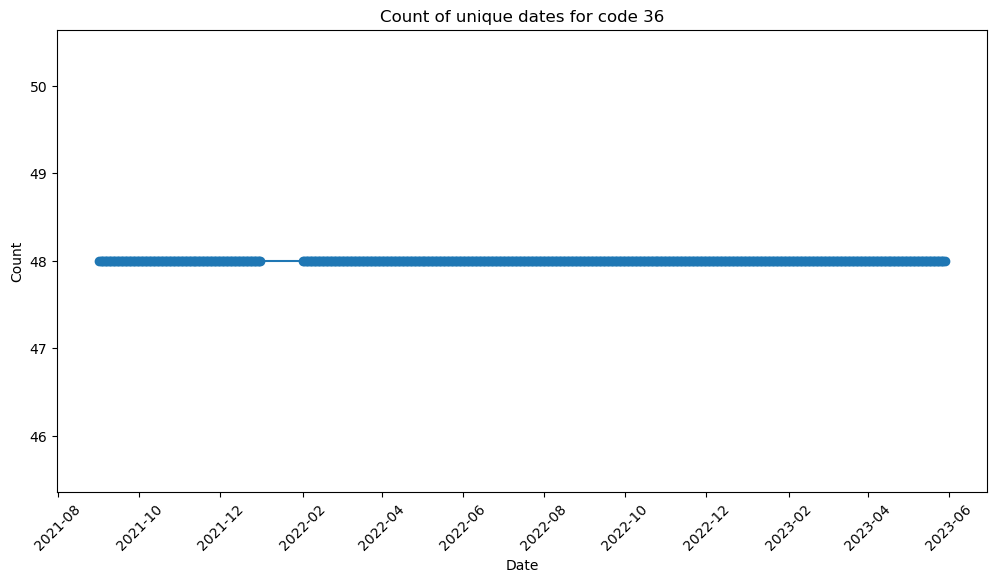

In [134]:
import matplotlib.pyplot as plt

# Assuming 'code_75_dates_counts' is the DataFrame you obtained
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

plt.plot(code_36_dates_counts['datetime_date_hist_weather_'], code_36_dates_counts['count'], marker='o')
plt.title('Count of unique dates for code 36')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [125]:
filtered_data = train[(train['code'] == 75) & (train['datetime_date_hist_weather_'] == '2023-04-01')]

In [126]:
filtered_data.head()

,county,is_business,product_type,target,is_consumption,datetime,prediction_unit_id,datetime_date_hist_weather_,year,month,week_num,day,hour,working_day,code,euros_per_mwh,mwh_mean,eic_count,installed_capacity,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,lat/long


1, Extract the data

In [148]:
# tal_train_cons_sample = tal_train_cons.sample(n=10000, random_state=42)
tal_train_cons_sample = tal_train_cons[(tal_train_cons['is_business'] == 0) & (tal_train_cons['product_type'] == 2)]

2. Check if all date values are present

In [ ]:
# Calculate time differences
time_diff = tal_train_cons_sample['datetime'].diff()

# Skip the first row when checking for missing timestamps
missing_timestamps = tal_train_cons_sample[time_diff != pd.Timedelta(hours=1)][1:]

# Print or inspect missing timestamps with date and time
print("Missing Timestamps:")
print(missing_timestamps[['datetime']])

3. Define the Prophet model

4. Fill missing data in Target column

In [151]:
tal_train_cons_sample['target'].fillna(method='ffill', inplace=True)

In [153]:
# Assuming tal_train_cons_sample is your DataFrame
# Rename columns 'datetime' to 'ds' and 'target' to 'y'
tal_train_cons_sample.rename(columns={'datetime': 'ds', 'target': 'y'}, inplace=True)

# Select relevant columns including the 'temperature' column as a regressor
data = tal_train_cons_sample[['ds', 'y', 'temperature']]

# Train-test split
train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
train, test = data[:train_size], data[train_size:]

# Creating a Prophet model with additional regressor
model = Prophet()
model.add_regressor('temperature')  # Add the 'temperature' column as a regressor

# Fitting the model with training data
model.fit(train)

# Creating a DataFrame with future dates for prediction
future = model.make_future_dataframe(periods=len(test), freq='H', include_history=False)

# Extracting 'temperature' values for the entire time range
all_temperatures = tal_train_cons_sample['temperature'][:len(train) + len(test)].values

# Adding 'temperature' values to the future DataFrame for prediction
future['temperature'] = all_temperatures[len(train):]

# Making predictions
forecast = model.predict(future)

# Extracting predictions for the test set
test_predictions = forecast[['ds', 'yhat']].tail(len(test))

# Evaluating performance on the test set
mae = mean_absolute_error(test['y'], test_predictions['yhat'])
print(f'Mean Absolute Error on the test set: {mae}')

15:34:06 - cmdstanpy - INFO - Chain [1] start processing
15:34:10 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error on the test set: 20.18948629837182


In [144]:
# Save the model to a pickle file
import pickle
with open('prophet_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

### Some additional Explorations

#### Electricity prices

In [137]:
electricity = pd.read_csv('data\electricity_prices.csv')
electricity.query('euros_per_mwh > 750')

,forecast_date,euros_per_mwh,origin_date,data_block_id
2335,2021-12-07 07:00:00,1000.07,2021-12-06 07:00:00,98
2342,2021-12-07 14:00:00,976.98,2021-12-06 14:00:00,98
2347,2021-12-07 19:00:00,792.12,2021-12-06 19:00:00,98
8190,2022-08-08 07:00:00,798.32,2022-08-07 07:00:00,342
8191,2022-08-08 08:00:00,861.14,2022-08-07 08:00:00,342
8194,2022-08-08 11:00:00,750.03,2022-08-07 11:00:00,342
8195,2022-08-08 12:00:00,792.19,2022-08-07 12:00:00,342
8196,2022-08-08 13:00:00,797.98,2022-08-07 13:00:00,342
8201,2022-08-08 18:00:00,861.11,2022-08-07 18:00:00,342
8202,2022-08-08 19:00:00,797.99,2022-08-07 19:00:00,342


#### Train data loading

In [139]:
train = pd.read_csv('data/train.csv')
train.isna().sum()

county                  0
is_business             0
product_type            0
target                528
is_consumption          0
datetime                0
data_block_id           0
row_id                  0
prediction_unit_id      0
dtype: int64

#### Plot Target variable over 3 days

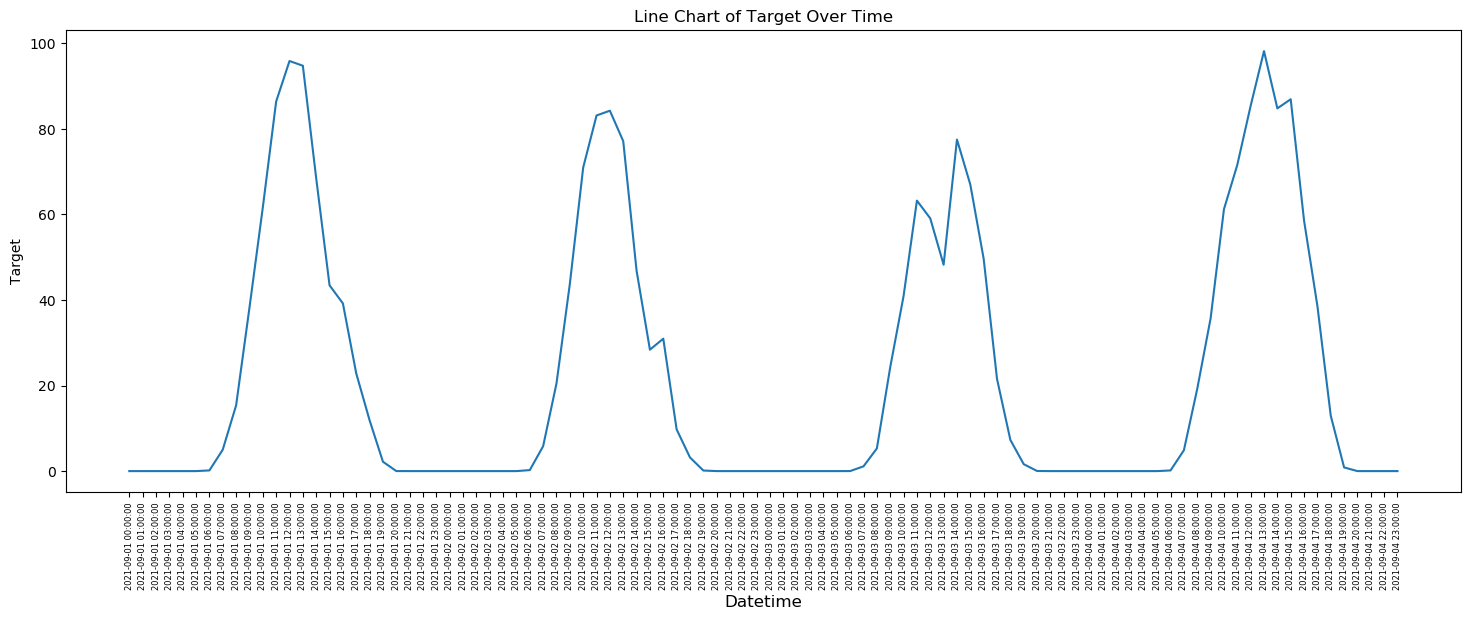

In [81]:
import matplotlib.pyplot as plt

# Assuming tal_train_filter is your DataFrame
tal_train_filter = tal_train_filter.sort_values(by='datetime')

# Set a larger figure size
plt.figure(figsize=(18, 6))  # Adjust the width (12) and height (6) as needed

plt.plot(tal_train_filter['datetime'], tal_train_filter['target'])
plt.xlabel('Datetime', fontsize=12)  # Adjust fontsize as needed
plt.ylabel('Target')
plt.title('Line Chart of Target Over Time')
plt.xticks(rotation=90, fontsize=6)  # Adjust fontsize as needed
plt.yticks(fontsize=10)  # Adjust fontsize as needed
plt.show()
